In [1]:
#libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt     
%matplotlib inline     
sns.set(color_codes=True)

#load data

sales=pd.read_excel(r'C:\Users\User\Desktop\project1\sales python\Online Retail.xlsx')

In [2]:
#view first few rows of the data
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
sales.shape #before cleaning

(541909, 8)

In [4]:
#get the data types
sales.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
#Summary statistics

sales.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
#remove unnecessary columns

sales.drop('CustomerID', axis=1, inplace=True)

In [7]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [8]:
#identifying missing values

sales.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [9]:
#Handling missing values 
sales['Description'].fillna('No Description', inplace=True)

In [10]:
sales.isna().sum() #missing values after cleaning

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [11]:
#cleaning the data

sales['Description'] = sales['Description'].replace(['?', '??', '? sold as sets?', '?? missing', '20713'], 'No Description')

#cleaning the data-remove asterics from the values

sales['Description'] = sales['Description'].str.replace("*", "", regex=False)

#cleaning the data-convert all values to upper case for uniformity

sales['Description'] = sales['Description'].str.upper()

In [12]:
#last few rows

sales.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,France


In [13]:
sales.shape #before removing duplicates

(541909, 7)

In [14]:
duplicate_rows_sales = sales [sales .duplicated()]
print("number of duplicate rows: ", duplicate_rows_sales.shape) #no of duplicate rows

number of duplicate rows:  (5268, 7)


In [15]:
sales.count()      # count of number of rows before removing duplicates

InvoiceNo      541909
StockCode      541909
Description    541908
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
Country        541909
dtype: int64

In [16]:
sales = sales.drop_duplicates() #remove duplicates

In [17]:
sales.count() #after removing duplicates

InvoiceNo      536641
StockCode      536641
Description    536640
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
Country        536641
dtype: int64

In [18]:
sales.shape #after removing duplicates

(536641, 7)

<Axes: xlabel='UnitPrice'>

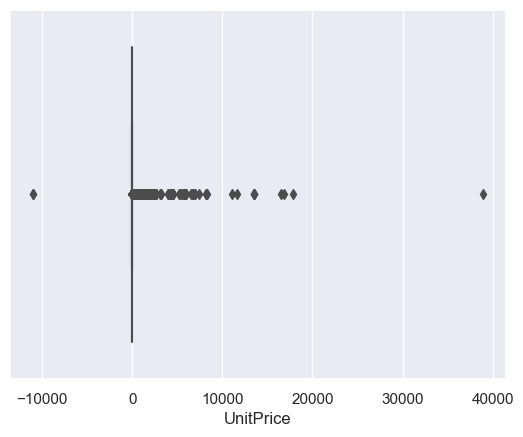

In [19]:
# Boxplot for UnitPrice to spot outliers
sns.boxplot(x=sales['UnitPrice'])

<Axes: xlabel='Quantity'>

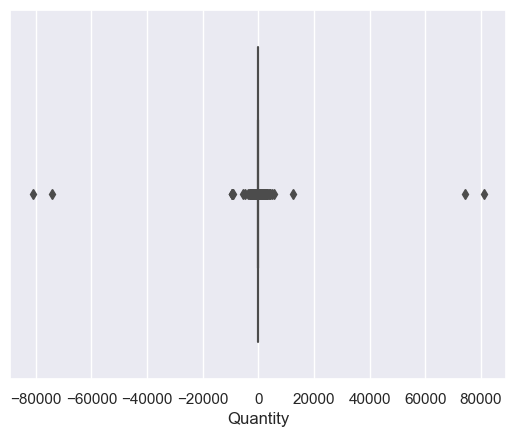

In [20]:
# Boxplot for Quantity to spot outliers
sns.boxplot(x=sales['Quantity'])

In [21]:
#handling outliers in Quantity

# calculating quantiles and IQR for 'Quantity' 
Q1 = sales['Quantity'].quantile(0.25)
Q3 = sales['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers in 'Quantity'
sales = sales[~((sales['Quantity'] < lower_bound) | (sales['Quantity'] > upper_bound))]

# new shape of the DataFrame
print(sales.shape)

(478140, 7)


<Axes: xlabel='Quantity'>

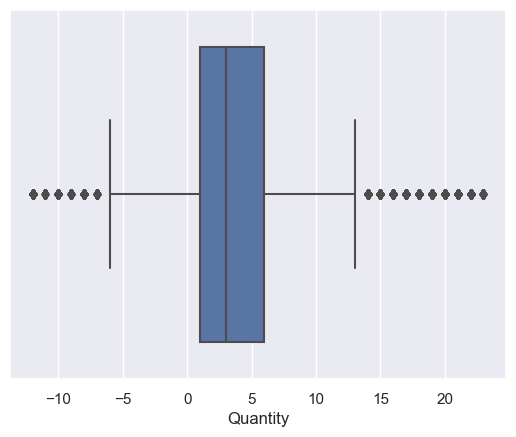

In [22]:
sns.boxplot(x=sales['Quantity']) #after removing outliers

In [23]:
#Removing outliers

# calculating quantiles and IQR for 'UnitPrice' 
Q1 = sales['UnitPrice'].quantile(0.25)
Q3 = sales['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers in 'UnitPrice'
sales = sales[~((sales['UnitPrice'] < lower_bound) | (sales['UnitPrice'] > upper_bound))]

# new shape of the DataFrame
print(sales.shape)

(445792, 7)


<Axes: xlabel='UnitPrice'>

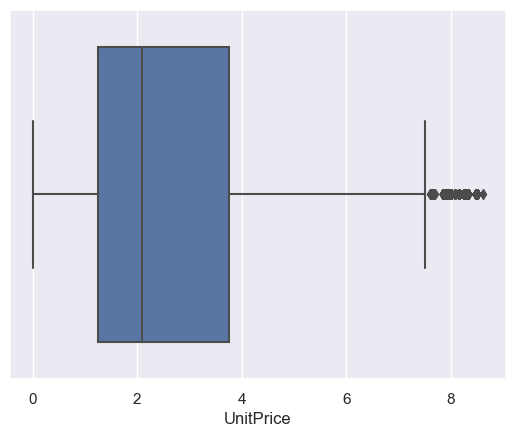

In [24]:
sns.boxplot(x=sales['UnitPrice']) #after removing outliers

In [25]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [26]:
#Top selling products

# Grouping by 'Description' and summing the 'Quantity', then sorting
top_products = sales.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# top 5 selling products
print(top_products.head(5))

Description
JUMBO BAG RED RETROSPOT               13930
ASSORTED COLOUR BIRD ORNAMENT         10915
WHITE HANGING HEART T-LIGHT HOLDER    10806
LUNCH BAG RED RETROSPOT               10374
LUNCH BAG  BLACK SKULL.                8103
Name: Quantity, dtype: int64


In [27]:
#top performing Countries

# Group by 'Description' and sum up the 'Quantity', then sort
top_products = sales.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# top 5 selling products
print(top_products.head(5))

Country
United Kingdom    1880112
Germany             59842
France              54252
EIRE                44992
Belgium             13439
Name: Quantity, dtype: int64


In [28]:
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [ ]:
#Analysis of the sales trends over time. Identifying the busiest months and days of the week in terms of sales.

In [65]:
sales['Month'] = sales['InvoiceDate'].dt.month #getting month from InvoiceDate

In [66]:
print(sales)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice         Country  Month    DayName  \


In [36]:
sales['DayName'] = sales['InvoiceDate'].dt.day_name() #getting day of the week from InvoiceDate

In [33]:
print(sales['DayName'])

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
541904       Friday
541905       Friday
541906       Friday
541907       Friday
541908       Friday
Name: DayName, Length: 445792, dtype: object


In [67]:
# Mapping the month integers to month names (for clarity in plotting)
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

sales['Name_of_month'] = sales['Month'].map(month_map)

# Converting 'MonthName' to a categorical type with the categories in chronological order
sales['Name_of_month'] = pd.Categorical(sales['Name_of_month'], 
                                 categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                             'July', 'August', 'September', 'October', 'November', 'December'],
                                 ordered=True)

In [68]:
# Aggregating sales by month
monthly_sales = sales.groupby('Name_of_month')['Quantity'].sum()

# reindex the monthly_sales Series to include all months
all_months = pd.Categorical(['January', 'February', 'March', 'April', 'May', 'June', 
                             'July', 'August', 'September', 'October', 'November', 'December'],
                            categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                        'July', 'August', 'September', 'October', 'November', 'December'],
                            ordered=True)
monthly_sales = monthly_sales.reindex(all_months, fill_value=0)

#Aggregating sales by day of the week

weekly_sales = sales.groupby('DayName')['Quantity'].sum()

In [39]:
# Sorting weekly_sales according to the order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(days_order)

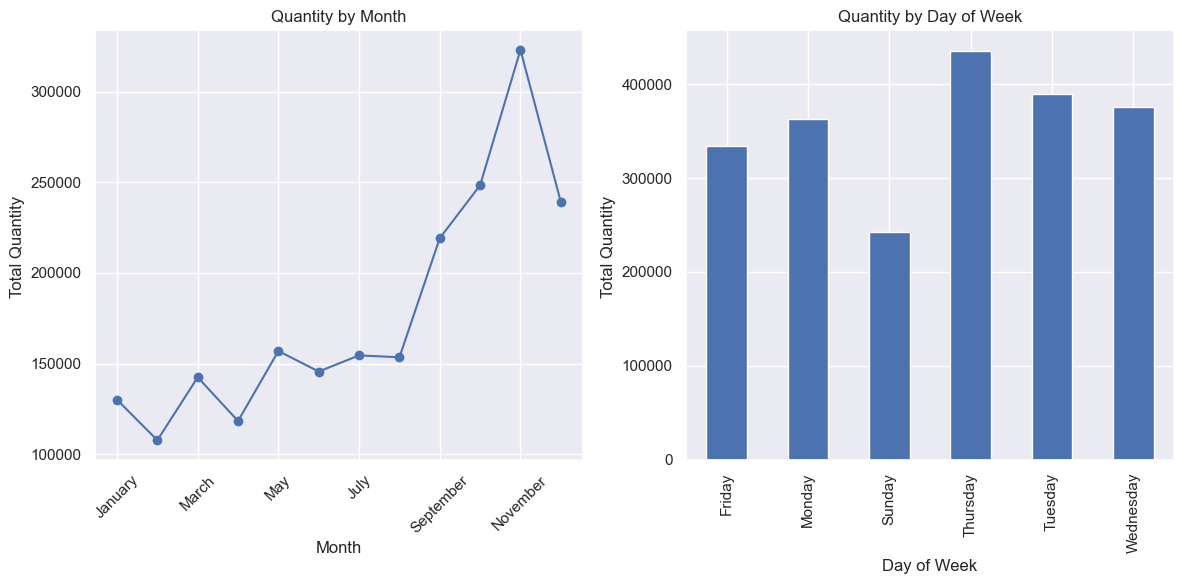

In [70]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
monthly_sales.plot(kind='line', marker='o')
plt.title('Quantity by Month')
plt.ylabel('Total Quantity ')
plt.xlabel('Month')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
weekly_sales.plot(kind='bar')
plt.title('Quantity by Day of Week')
plt.ylabel('Total Quantity ')
plt.xlabel('Day of Week')

plt.tight_layout()
plt.show()

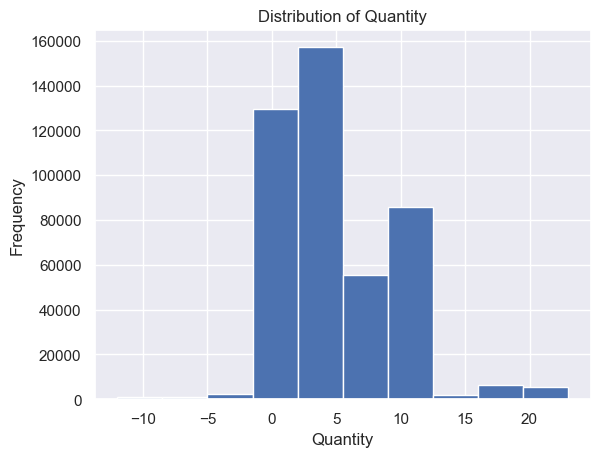

In [50]:
# Histogram of Quantity
sales['Quantity'].hist(bins=10)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

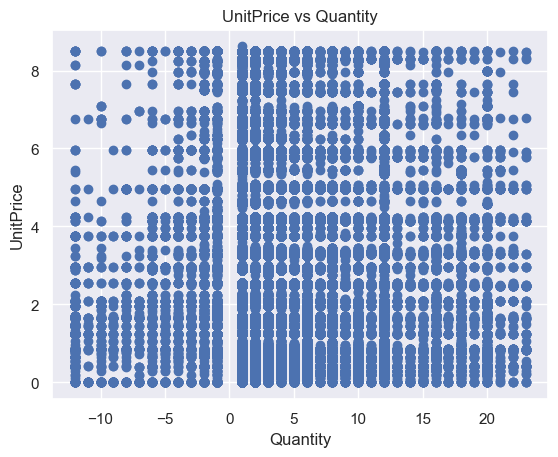

In [51]:
# Scatter plot of UnitPrice vs Quantity
plt.scatter(sales['Quantity'], sales['UnitPrice'])
plt.title('UnitPrice vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

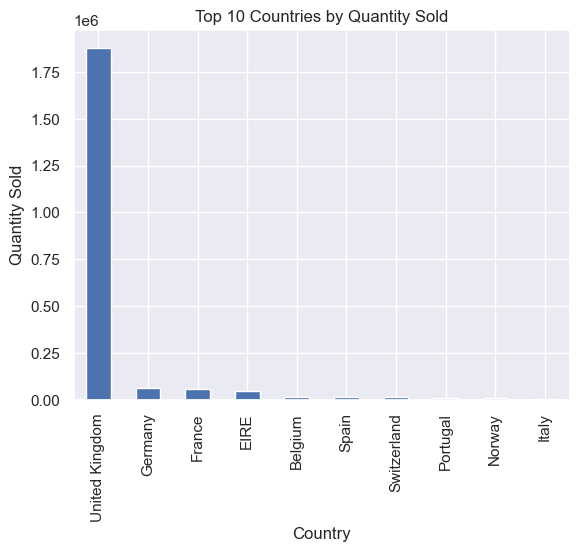

In [52]:
# Bar plot of sales by Country (Top 10)
top_countries = sales.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Country')
plt.ylabel('Quantity Sold')
plt.show()